In [1]:
import sys
sys.path.insert(0, '../src')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns

from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial.distance import cdist
from scipy.spatial import ConvexHull

import itertools
import random
import time

from utils import *
from helper import *
from collections import Counter

plt.style.use('seaborn-darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

np.random.seed(260647775)

In [2]:
def condition(coord):
    x, y = coord
    
    return (x-25)**2 + (y-25)**2 < 225 # radius 15

grid      = [[(x, y) for y in range(50)] for x in range(50)]
grayscale = [[2 if condition(tup) else 0.5 for tup in row] for row in grid]

noise = np.random.normal(0, 0.7, size=(50, 50))

In [3]:
noisy_image = grayscale - noise
np.putmask(noisy_image, noisy_image < 0, 0)
np.putmask(noisy_image, noisy_image > 2, 2)

### Visualization of results from Google Cloud

In [4]:
x_sample = np.load('../samples/x_samples.npy')
k_sample = np.load('../samples/k_samples.npy')

Text(0.5, 1.0, 'Deblurred image')

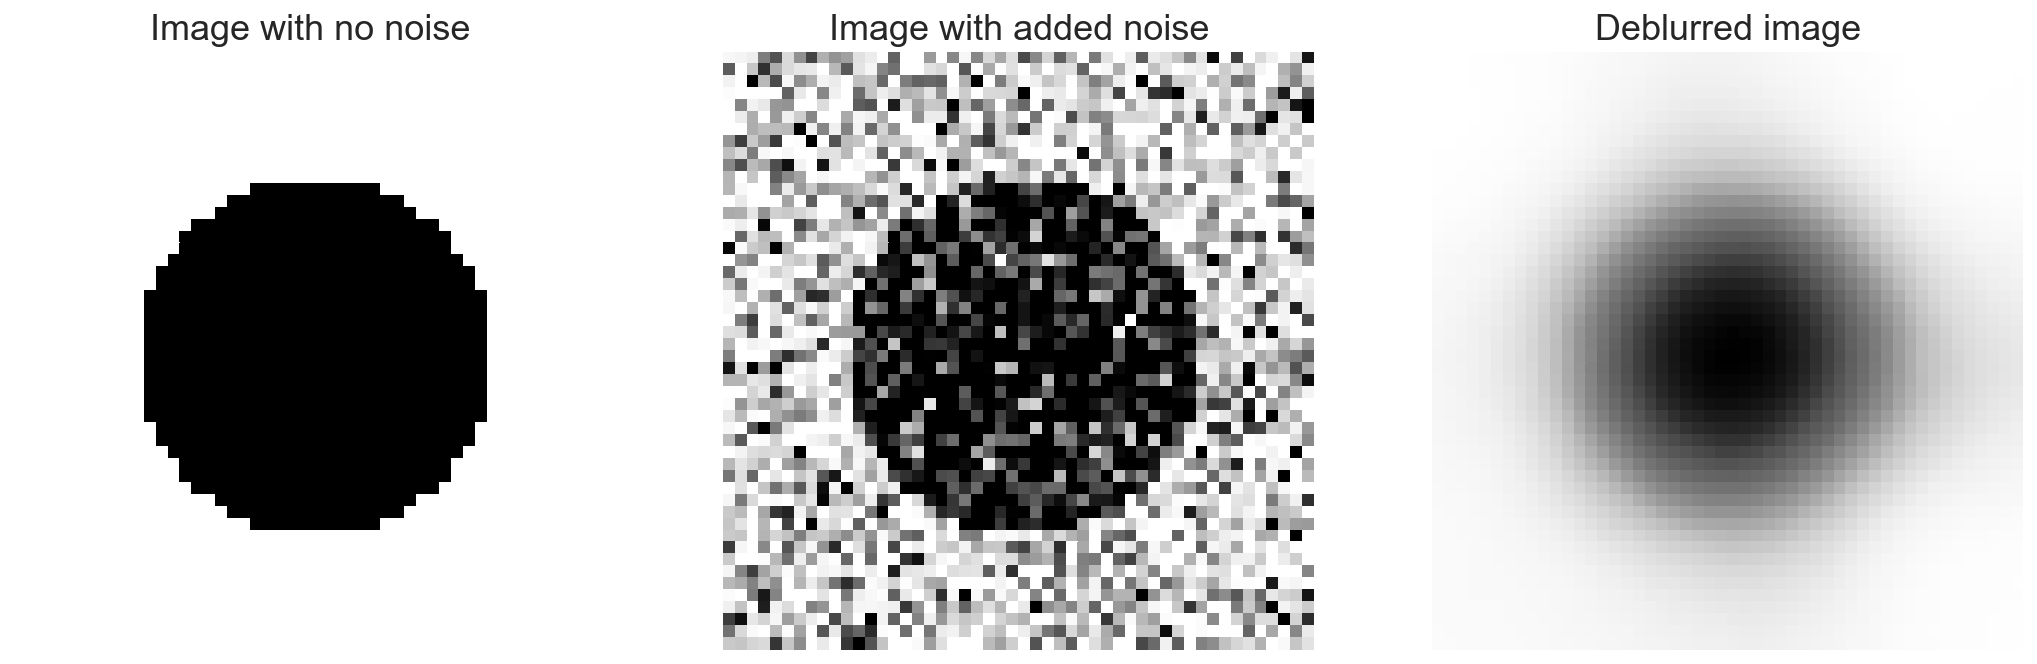

In [5]:
fig, axes = plt.subplots(figsize=(18, 5.5), nrows=1, ncols=3)
axes[0] = sns.heatmap(grayscale,
                        cmap='Greys',
                        cbar=False,
                        xticklabels='',
                        yticklabels='',
                        ax=axes[0])
plt.axis('off')
axes[1] = sns.heatmap(noisy_image,
                      cmap='Greys',
                      cbar=False,
                      xticklabels='',
                      yticklabels='',
                      ax=axes[1])

axes[2] = sns.heatmap(np.mean(x_sample, axis=0).reshape(50, 50), 
                      cmap='Greys',
                      cbar=False,
                      xticklabels='',
                      yticklabels='',
                      ax=axes[2])

axes[0].set_title('Image with no noise', fontsize=18)
axes[1].set_title('Image with added noise', fontsize=18)
axes[2].set_title('Deblurred image', fontsize=18)

Text(0, 0.5, 'Iteration')

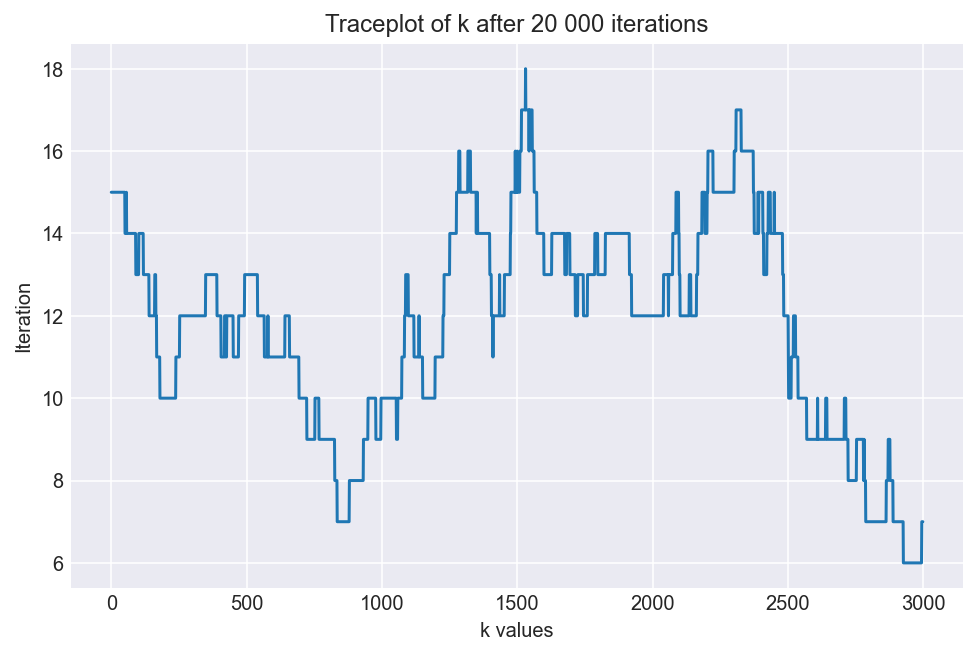

In [6]:
fig = plt.figure(figsize=(8, 5))
plt.plot(k_sample)
plt.title('Traceplot of k after 20 000 iterations')
plt.xlabel('k values')
plt.ylabel('Iteration')